In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [54]:
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [55]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


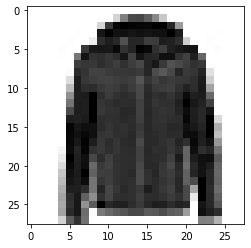

In [56]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

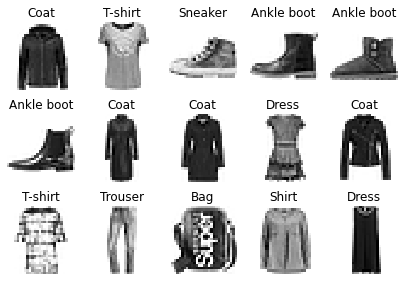

In [57]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [58]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [59]:
model.layers

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [61]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [70]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 748us/step - loss: 0.2206 - accuracy: 0.9175 - val_loss: 0.4491 - val_accuracy: 0.8798
Epoch 2/10
1719/1719 [==============================] - 1s 733us/step - loss: 0.2187 - accuracy: 0.9184 - val_loss: 0.4578 - val_accuracy: 0.8734
Epoch 3/10
1719/1719 [==============================] - 1s 737us/step - loss: 0.2189 - accuracy: 0.9189 - val_loss: 0.4676 - val_accuracy: 0.8766
Epoch 4/10
1719/1719 [==============================] - 1s 739us/step - loss: 0.2183 - accuracy: 0.9194 - val_loss: 0.4712 - val_accuracy: 0.8724
Epoch 5/10
1719/1719 [==============================] - 1s 741us/step - loss: 0.2168 - accuracy: 0.9193 - val_loss: 0.4585 - val_accuracy: 0.8734
Epoch 6/10
1719/1719 [==============================] - 1s 741us/step - loss: 0.2148 - accuracy: 0.9197 - val_loss: 0.4571 - val_accuracy: 0.8772
Epoch 7/10
1719/1719 [==============================] - 1s 738us/step - loss: 0.2143 - accuracy: 0.9207 - val_loss: 0.4550 -

In [71]:
type(history)

tensorflow.python.keras.callbacks.History

In [72]:
history.history

{'loss': [0.22059783339500427,
  0.21871191263198853,
  0.2189498245716095,
  0.21834047138690948,
  0.2167886644601822,
  0.21475909650325775,
  0.21432775259017944,
  0.21243426203727722,
  0.2120395004749298,
  0.21112346649169922],
 'accuracy': [0.9174727201461792,
  0.91839998960495,
  0.9189090728759766,
  0.9193817973136902,
  0.9192545413970947,
  0.9197090864181519,
  0.9207090735435486,
  0.9206908941268921,
  0.9205818176269531,
  0.9204727411270142],
 'val_loss': [0.44905155897140503,
  0.457838237285614,
  0.467637836933136,
  0.47119539976119995,
  0.45854467153549194,
  0.4571188986301422,
  0.45496317744255066,
  0.46246328949928284,
  0.47293946146965027,
  0.4745292067527771],
 'val_accuracy': [0.879800021648407,
  0.8733999729156494,
  0.8766000270843506,
  0.8723999857902527,
  0.8733999729156494,
  0.8772000074386597,
  0.8712000250816345,
  0.8790000081062317,
  0.8790000081062317,
  0.878000020980835]}

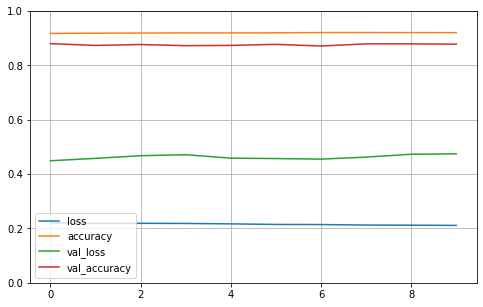

In [73]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)